In [1]:
pip install pandas-datareader

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import our dependencies
import csv
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## ETL Webscraping (Wikipedia - S&P 500 Companies)

In [3]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [4]:
soup = bs(req.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [5]:
table = soup.find("table", class_= "wikitable sortable")
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [6]:
companies = df.drop(["SEC filings"], axis=1)
companies = companies.rename(columns={"GICS Sector": "GICS_Sector", "GICS Sub-Industry": "GICS_Sub_Industry","Headquarters Location": "Headquarters", "Date first added": "Date_First_Added"})
print(companies.head())

  Symbol     Security  GICS_Sector         GICS_Sub_Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

              Headquarters Date_First_Added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [7]:
companies.to_csv("IT_companies.csv", index = False)

In [8]:
# Note: Companies file can be used to get the list of ALL tickers for automating

## ETL Stocks Data (Yahoo Finance)

In [9]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [10]:
df_Close = df_SPY["Close"]
df_Close.name = "SPY"

In [11]:
df_Close


Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-07-11    384.230011
2022-07-12    380.829987
2022-07-13    378.829987
2022-07-14    377.910004
2022-07-15    385.130005
Name: SPY, Length: 639, dtype: float64

#### 4 Companies in the Real Estate Sector

In [12]:
symbols = ["SPG", "AVB", "EXR", "LAMR"]

for symbol in symbols:
    stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
    stock.to_csv(f"{symbol}.csv")
    
print("Complete")


Complete


In [13]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [14]:
df = df_SPY[["Close"]]
df = df.rename(columns = {"Close": "SPY"})
df

,SPY
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2022-07-11,384.230011
2022-07-12,380.829987
2022-07-13,378.829987


In [15]:
## Note: If you need another column, Change "Close" to respective column, e.g., "Volume"
## Note: SPY is a standard dataset for getting ALL traded dates correctly, and any NULL values are dropped here, and SPY column is also dropped

symbols = ["SPG", "AVB", "EXR", "LAMR"]
def get_data(symbols):    
    df = df_SPY[["Close"]]
    df = df.rename(columns = {"Close": "SPY"})
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates = True, 
                         usecols = ["Date", "Close"], na_values = "nan")
        df_temp = df_temp.rename(columns = {"Close": symbol})
        df = df.join(df_temp)
    return df
df_RE = get_data(symbols)
df_RE = df_RE.drop(columns="SPY")

In [16]:
df_RE

,SPG,AVB,EXR,LAMR
Date,,,,
2020-01-02,145.089996,207.240005,104.730003,88.449997
2020-01-03,145.350006,209.229996,106.519997,89.010002
2020-01-06,146.110001,209.580002,106.449997,88.459999
2020-01-07,144.449997,205.020004,105.970001,88.129997
2020-01-08,145.399994,205.869995,106.180000,88.709999
...,...,...,...,...
2022-07-11,97.220001,190.550003,172.039993,90.300003
2022-07-12,97.599998,191.339996,167.000000,90.470001
2022-07-13,95.559998,190.550003,167.619995,90.379997


In [17]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_SPG = web.DataReader('SPG', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_SPG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,149.759995,144.850006,149.410004,145.089996,1849300.0,126.021027
2020-01-03,145.979996,144.000000,144.289993,145.350006,1308200.0,126.246880
2020-01-06,146.869995,144.490005,145.089996,146.110001,1026700.0,126.906982
2020-01-07,145.490005,143.509995,144.639999,144.449997,1621600.0,125.465149
2020-01-08,146.059998,144.029999,144.910004,145.399994,1397600.0,126.290291
...,...,...,...,...,...,...
2022-07-11,97.510002,95.730003,96.980003,97.220001,1032400.0,97.220001
2022-07-12,99.139999,96.980003,97.199997,97.599998,1660400.0,97.599998
2022-07-13,97.150002,95.040001,96.019997,95.559998,1821400.0,95.559998


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

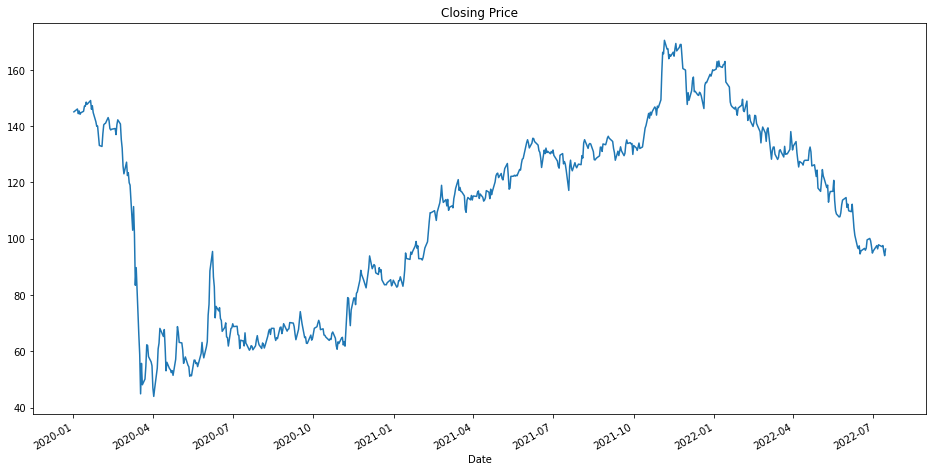

In [18]:
df_RE["SPG"].plot(figsize = (16, 8), title = "Closing Price")

In [19]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_SPG = web.DataReader('AVB', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_SPG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,210.910004,206.070007,210.460007,207.240005,817400.0,190.337540
2020-01-03,209.570007,206.309998,206.380005,209.229996,672100.0,192.165192
2020-01-06,209.869995,208.240005,209.059998,209.580002,602000.0,192.486694
2020-01-07,208.580002,204.779999,208.190002,205.020004,850500.0,188.298584
2020-01-08,206.830002,204.559998,205.289993,205.869995,872300.0,189.079269
...,...,...,...,...,...,...
2022-07-11,191.380005,189.320007,189.800003,190.550003,611900.0,190.550003
2022-07-12,193.309998,189.029999,189.029999,191.339996,614800.0,191.339996
2022-07-13,191.449997,187.229996,189.759995,190.550003,484500.0,190.550003


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

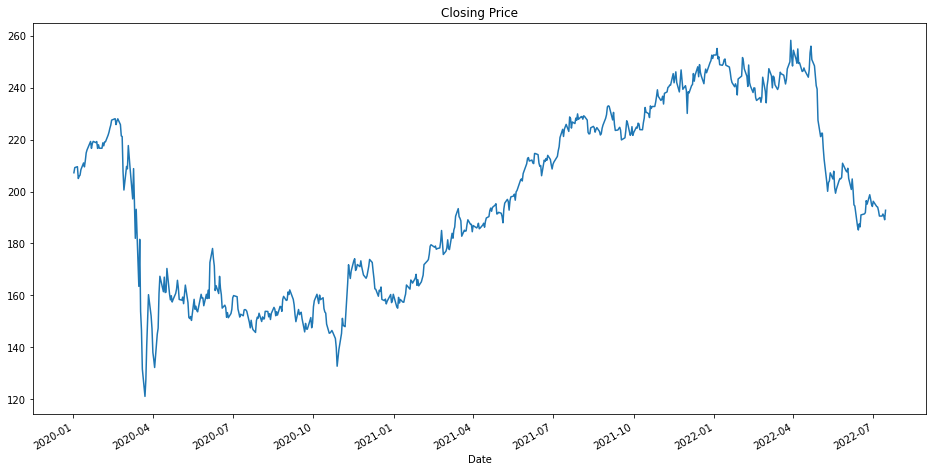

In [20]:
df_RE["AVB"].plot(figsize = (16, 8), title = "Closing Price")

In [21]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_SPG = web.DataReader('EXR', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_SPG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,105.930000,104.230003,105.879997,104.730003,950900.0,96.765518
2020-01-03,106.589996,104.400002,104.580002,106.519997,745000.0,98.419395
2020-01-06,107.019997,105.709999,106.510002,106.449997,1207800.0,98.354698
2020-01-07,106.260002,105.260002,105.889999,105.970001,893600.0,97.911209
2020-01-08,106.410004,105.150002,105.989998,106.180000,791200.0,98.105232
...,...,...,...,...,...,...
2022-07-11,174.750000,171.520004,171.860001,172.039993,360400.0,172.039993
2022-07-12,172.240005,165.419998,170.539993,167.000000,504500.0,167.000000
2022-07-13,169.139999,164.699997,165.470001,167.619995,332700.0,167.619995


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

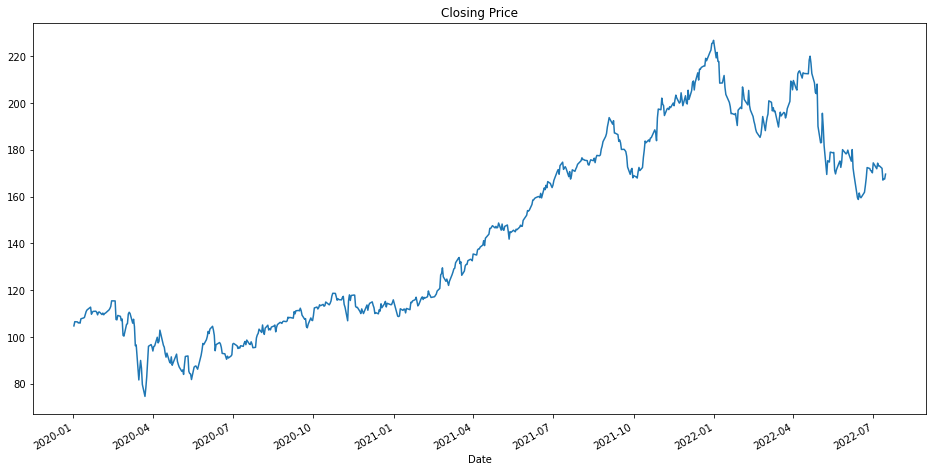

In [22]:
df_RE["EXR"].plot(figsize = (16, 8), title = "Closing Price")

In [23]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_SPG = web.DataReader('LAMR', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_SPG

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,89.209999,87.650002,89.190002,88.449997,430500.0,80.165558
2020-01-03,89.099998,87.989998,88.080002,89.010002,244700.0,80.673103
2020-01-06,88.900002,87.959999,88.459999,88.459999,390700.0,80.174614
2020-01-07,88.220001,87.370003,88.169998,88.129997,171700.0,79.875519
2020-01-08,89.070000,88.139999,88.199997,88.709999,221900.0,80.401199
...,...,...,...,...,...,...
2022-07-11,91.629997,89.760002,90.620003,90.300003,389100.0,90.300003
2022-07-12,91.589996,89.769997,90.190002,90.470001,363200.0,90.470001
2022-07-13,90.529999,89.019997,89.180000,90.379997,295300.0,90.379997


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

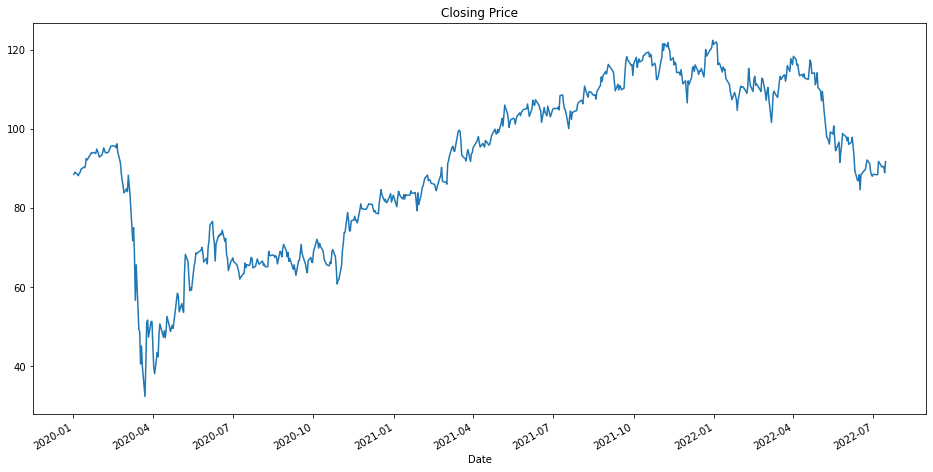

In [24]:
df_RE["LAMR"].plot(figsize = (16, 8), title = "Closing Price")

<AxesSubplot:xlabel='Date'>

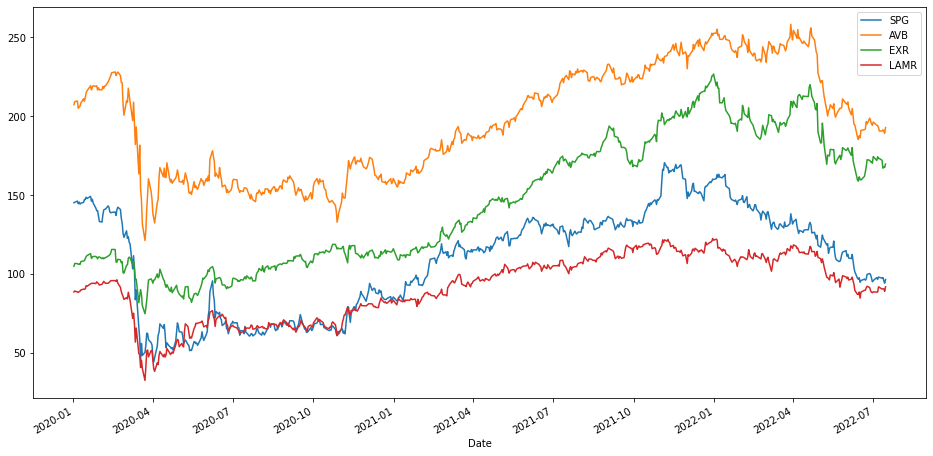

In [25]:
df_RE.plot(figsize = (16, 8))
